In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, hilbert, welch
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
np.random.seed(42)

In [4]:
for dirname, _, filenames in os.walk('datasets1'):
    dataFile_quant = np.empty(len(filenames), dtype='object')
    for ii, filename in enumerate(filenames, start=0):
        dataFile_quant[ii] = (os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

ps_0.4_phases_80_snr_25.csv
datasets1\fileID_10020907_INL_0000000_freq_14000000_amps_0.4_phases_80_snr_27.csv
datasets1\fileID_10020908_INL_0000000_freq_14000000_amps_0.4_phases_80_snr_29.csv
datasets1\fileID_10021001_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_15.csv
datasets1\fileID_10021002_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_17.csv
datasets1\fileID_10021003_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_19.csv
datasets1\fileID_10021004_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_21.csv
datasets1\fileID_10021005_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_23.csv
datasets1\fileID_10021006_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_25.csv
datasets1\fileID_10021007_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_27.csv
datasets1\fileID_10021008_INL_0000000_freq_14000000_amps_0.4_phases_90_snr_29.csv
datasets1\fileID_10030101_INL_0000000_freq_14000000_amps_0.5_phases_0_snr_15.csv
datasets1\fileID_10030102_INL_0000000_freq_14000000_amps_0.5_phases_0_s

In [ ]:
featuresDF = pd.DataFrame(columns=['time', 'signal', 'inPhase', 'quadrature', 'frequency', 'amplitude', 'phase', 'snr'])
for ii in range(len(dataFile_quant)):
    df_time = np.transpose(np.array(pd.read_csv(dataFile_quant[ii], header= None, usecols=[0], dtype='float64')))[0]
    df_gen = np.transpose(np.array(pd.read_csv(dataFile_quant[ii], header= None, usecols=[1], dtype='float64')))[0]
    analytical_data = hilbert(df_gen)
    df_ip = analytical_data.real
    df_quad = analytical_data.imag
    df_freq  = float(os.path.split(dataFile_quant[ii])[1].split('.csv')[0].split('_')[5])
    df_amp   = float(os.path.split(dataFile_quant[ii])[1].split('.csv')[0].split('_')[7])
    df_phase = float(os.path.split(dataFile_quant[ii])[1].split('.csv')[0].split('_')[9])
    df_snr =   int(os.path.split(dataFile_quant[867])[1].split('.csv')[0].split('_')[11])
    featuresDF = featuresDF.append({'time': df_time,
                                    'signal': df_gen, 
                                    'inPhase': df_ip, 'quadrature': df_quad,
                                    'frequency': df_freq,
                                    'amplitude': df_amp, 'phase': df_phase,
                                    'snr': df_snr}, ignore_index=True)

#featuresDF['frequency'] = pd.to_numeric(featuresDF['frequency'])
featuresDF['snr'] = pd.to_numeric(featuresDF['snr'])
print(featuresDF.head())
print("\nData Types")
print(featuresDF.dtypes)

In [ ]:
featuresDF.to_pickle('dataFrames/featuresDF1.p')

In [5]:
featuresDF = pd.read_pickle('dataFrames/featuresDF1.p')
print(featuresDF.head())

                                                time  \
0  [0.0, 5.0025012506253105e-09, 1.00050025012506...   
1  [0.0, 5.0025012506253105e-09, 1.00050025012506...   
2  [0.0, 5.0025012506253105e-09, 1.00050025012506...   
3  [0.0, 5.0025012506253105e-09, 1.00050025012506...   
4  [0.0, 5.0025012506253105e-09, 1.00050025012506...   

                                              signal  \
0  [-0.0416250886115178, 0.0546672468762201, 0.13...   
1  [0.0445799213276981, 0.0414318420560583, 0.019...   
2  [-0.0072194418140698, 0.072979546357136, 0.118...   
3  [-0.0082247796374126, 0.0529785273385114, 0.09...   
4  [-0.0345947578033688, 0.0281255687052605, 0.05...   

                                             inPhase  \
0  [-0.0416250886115178, 0.05466724687622012, 0.1...   
1  [0.044579921327698106, 0.0414318420560583, 0.0...   
2  [-0.007219441814069803, 0.07297954635713601, 0...   
3  [-0.008224779637412607, 0.05297852733851139, 0...   
4  [-0.03459475780336879, 0.02812556870526052,

In [6]:
fs = 200e6        # Simulation sampling rate (Hz)
fs_adc = 100e6    # ADC sampling rate (Hz)
t_end = 1e-5     # Simulation end time (seconds)
t = np.linspace(0, t_end, int(fs*t_end))
print("There are {} elements per sample".format(len(t)))

There are 2000 elements per sample


In [7]:
# Which Figure to show for examples
showFig = 100

Signal Frequency: 4000000.0
Signal Amplitude: 0.4
Signal Phase:     20.0


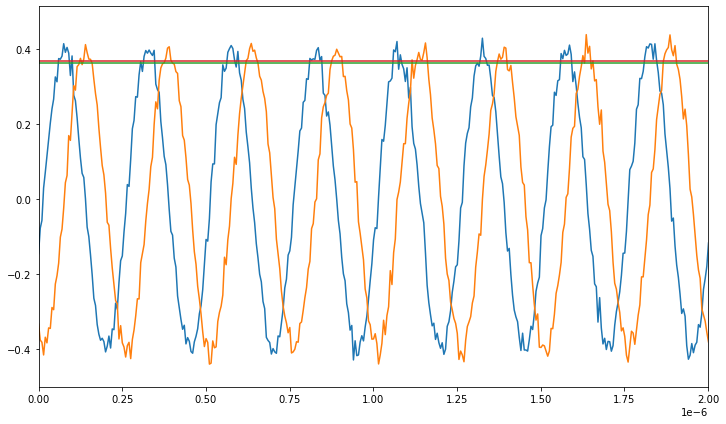

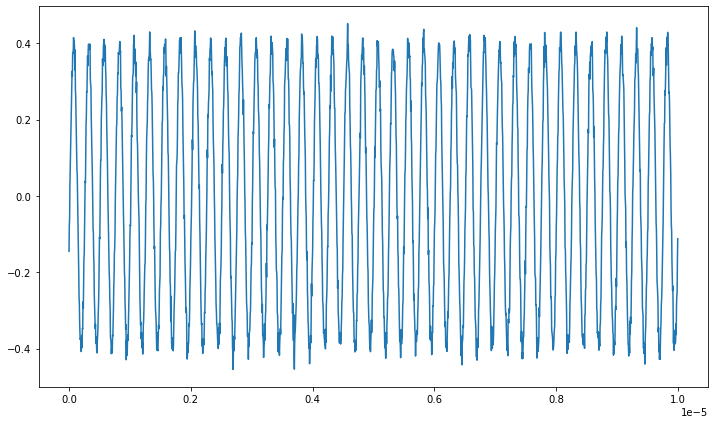

In [8]:
#IQ Data testing
def FilteredSignal(signal, fs, cutoff):
    B, A = butter(1, cutoff / (fs / 2), btype='low')
    filtered_signal = filtfilt(B, A, signal, axis=0)
    return filtered_signal

time = featuresDF.at[showFig, 'time']
testdata = featuresDF.at[showFig, 'signal']
cutoff = featuresDF.at[showFig, 'frequency']
analytical_testdata = hilbert(testdata)
amplitudeEnvelope = np.abs(analytical_testdata)
filteredSignal = FilteredSignal(amplitudeEnvelope, fs, cutoff)

print("Signal Frequency: {}".format(featuresDF.at[showFig,'frequency']))
print("Signal Amplitude: {}".format(featuresDF.at[showFig,'amplitude']))
print("Signal Phase:     {}".format(featuresDF.at[showFig,'phase']))
plt.figure(figsize=(12,7))
plt.xlim(0,2e-6)
plt.plot(time, analytical_testdata.real)
plt.plot(time, analytical_testdata.imag)
plt.plot(amplitudeEnvelope)
plt.plot(filteredSignal)

plt.figure(figsize=(12,7))
plt.plot(time, testdata)

In [9]:
iq_sig = featuresDF.at[showFig, 'inPhase']*np.cos(2*np.pi*fs*t) - featuresDF.at[showFig, 'quadrature']*np.sin(2*np.pi*fs*t)

Signal Frequency: 4000000.0
Signal Amplitude: 0.4
Signal Phase:     20.0


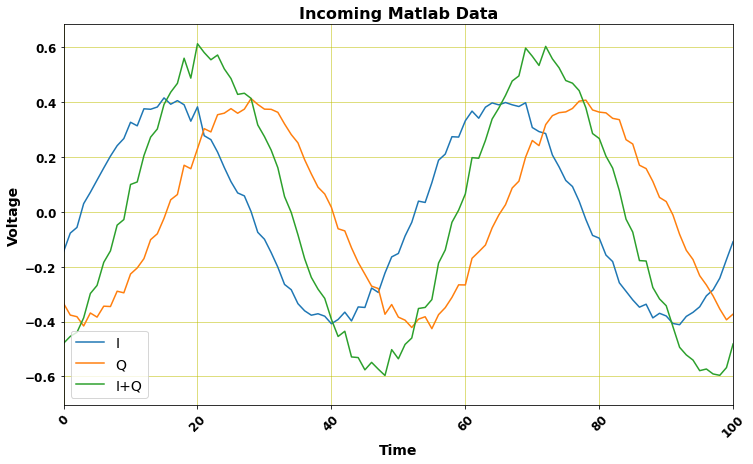

In [10]:
print("Signal Frequency: {}".format(featuresDF.at[showFig,'frequency']))
print("Signal Amplitude: {}".format(featuresDF.at[showFig,'amplitude']))
print("Signal Phase:     {}".format(featuresDF.at[showFig,'phase']))
plt.figure(figsize=(12,7))
plt.plot(featuresDF.at[showFig, 'inPhase'])
plt.plot(featuresDF.at[showFig, 'quadrature'])
plt.plot(featuresDF.at[showFig, 'inPhase'] + featuresDF.at[showFig, 'quadrature'])
plt.legend(['I', 'Q', 'I+Q'], loc='lower left', prop={'size': 14})
plt.title('Incoming Matlab Data', weight='bold', fontsize=16)
plt.xlabel('Time', weight='bold', fontsize=14)
plt.ylabel('Voltage', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)
plt.xlim(0,100)
plt.show()

Signal Frequency: 4000000.0
Signal Amplitude: 0.4
Signal Phase:     20.0


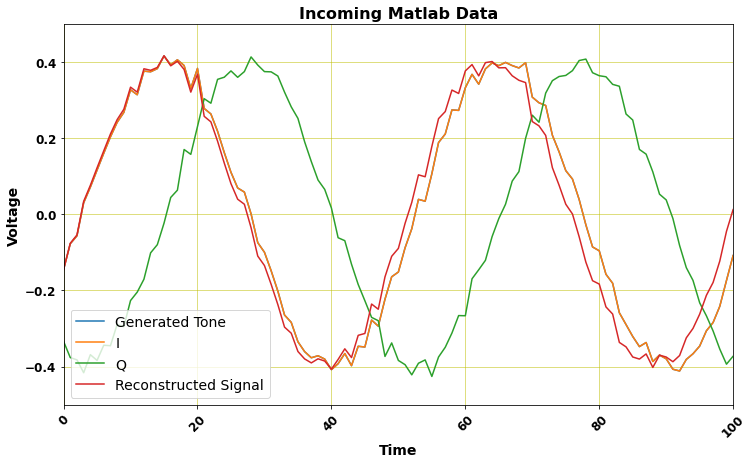

In [11]:
print("Signal Frequency: {}".format(featuresDF.at[showFig,'frequency']))
print("Signal Amplitude: {}".format(featuresDF.at[showFig,'amplitude']))
print("Signal Phase:     {}".format(featuresDF.at[showFig,'phase']))
plt.figure(figsize=(12,7))
plt.plot(featuresDF.at[showFig, 'signal'])
plt.plot(featuresDF.at[showFig, 'inPhase'])
plt.plot(featuresDF.at[showFig, 'quadrature'])
plt.plot(iq_sig)
plt.legend(['Generated Tone', 'I', 'Q', 'Reconstructed Signal'], loc='lower left', prop={'size': 14})
plt.title('Incoming Matlab Data', weight='bold', fontsize=16)
plt.xlabel('Time', weight='bold', fontsize=14)
plt.ylabel('Voltage', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)
plt.xlim(0,100)
plt.show()

Signal Frequency: 4000000.0
Signal Amplitude: 0.4
Signal Phase:     20.0


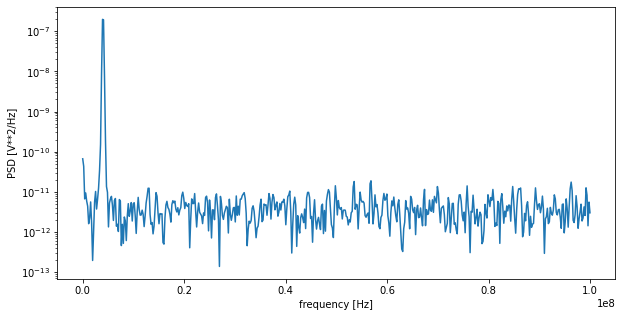

In [12]:
f, Pxx_den = welch(featuresDF.at[showFig,'signal'], fs, nperseg=1024)

print("Signal Frequency: {}".format(featuresDF.at[showFig,'frequency']))
print("Signal Amplitude: {}".format(featuresDF.at[showFig,'amplitude']))
print("Signal Phase:     {}".format(featuresDF.at[showFig,'phase']))
plt.figure(figsize=(10,5))
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape data
signal_df_r = featuresDF
signal_df_r['iq'] = ''
for ii in range(0, len(signal_df_r)):
    signal_sample = signal_df_r.at[ii,'signal']
    i_sample = signal_df_r.at[ii,'inPhase']
    q_sample = signal_df_r.at[ii,'quadrature']

    # Normalize the dataset
    signal_sample = np.asarray(signal_sample).reshape(-1,1)
    i_sample = np.asarray(i_sample).reshape(-1,1)
    q_sample = np.asarray(q_sample).reshape(-1,1)

    signal_sample = scaler.fit_transform(signal_sample)
    #i_sample = scaler.fit_transform(i_sample)
    #q_sample = scaler.fit_transform(q_sample)

    #signal_sample = signal_sample.reshape(width, height, 1)
    #signal_sample = signal_sample.reshape(50, 40, 1)
    signal_df_r.at[ii,'signal'] = np.array(signal_sample).squeeze()

    iq_sample = np.concatenate([i_sample, q_sample], axis=1)

    #iq_sample = signal_sample.reshape((iq_sample.shape[0], iq_sample.shape[1], 1))
    iq_sample = np.expand_dims(iq_sample, 2)
    signal_df_r.at[ii,'iq'] = np.array(iq_sample)

In [14]:
print(signal_df_r.shape)
print(signal_df_r.at[showFig,'iq'].shape)

(6400, 9)
(2000, 2, 1)


In [15]:
#Split the dataset 
from sklearn.model_selection import train_test_split 
train_df, test_validation_df = train_test_split(signal_df_r, train_size=0.8, test_size=0.2, random_state = 42, shuffle=True)
valid_df, test_df = train_test_split(test_validation_df, train_size=0.5, test_size=0.5, random_state = 42, shuffle=True)
print("Shape of train inputs {}, train target {}".format(train_df['signal'].iloc[0].shape, train_df.shape))
print("Shape of validation inputs {}, validation target {}".format(valid_df['signal'].iloc[0].shape, valid_df.shape))
print("Shape of test inputs {}, test target {}".format(test_df['signal'].iloc[0].shape, test_df.shape))

Shape of train inputs (2000,), train target (5120, 9)
Shape of validation inputs (2000,), validation target (640, 9)
Shape of test inputs (2000,), test target (640, 9)


In [16]:
train_features = np.array(train_df.iq.to_list()).squeeze()
valid_features = np.array(valid_df.iq.to_list()).squeeze()
test_features = np.array(test_df.iq.to_list()).squeeze()

train_labels = np.array(train_df.phase.to_list())
valid_labels = np.array(valid_df.phase.to_list())
test_labels = np.array(test_df.phase.to_list())

In [17]:
#Import TensorFlow Libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, \
                                    ReLU, LeakyReLU, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

#ADDED CONFIG OPTIONS FOR STABILTY
#TensorFlow allocating all of the GPU memory 
#to itself when it initialises the session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
#Reset Default graph - Needed only for Jupyter Notebook
tf.compat.v1.reset_default_graph()
tf.compat.v1.set_random_seed(42)

In [18]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using GPU


In [62]:
# Model configuration
batch_size = 1024
no_epochs = 300
verbosity = 1

In [20]:
modelType = "DNN"
modelName = "nanoConvPaper_v3.3.3_phase"
logDir = "logging" + "\\" + modelType + "\\" + modelName

In [21]:
modelDir = 'models'
modelSaveFile = modelDir + "\\" + modelType + "\\" + modelName + '.h5'

#Initialize model

initializer = tf.keras.initializers.GlorotUniform()
regulizer = tf.keras.regularizers.l2(l2=0.01)

#Add Layers
input_layer = Input(shape=(2000,2))
regressor = BatchNormalization()(input_layer)
regressor = Dense(2, kernel_initializer=initializer, kernel_regularizer=regulizer, activation='relu')(regressor)
regressor = Dropout(0.5)(regressor)
regressor = Dense(2, kernel_initializer=initializer, kernel_regularizer=regulizer, activation='relu')(regressor)
#regressor = BatchNormalization()(regressor)
regressor = Dropout(0.5)(regressor)
regressor = Dense(3, kernel_initializer=initializer, kernel_regularizer=regulizer, activation='relu')(regressor)
regressor = Flatten()(regressor)

phase_extract = Dense(1, activation=None, name='phase_extract')(regressor)

#Initialize model

#Add Layers
input_layer = Input(shape=(2000,2))
regressor = BatchNormalization()(input_layer)
regressor = Dense(2, activation='relu')(regressor)
#regressor = BatchNormalization()(regressor)
regressor = Dropout(0.5)(regressor)
regressor = Dense(2, activation='relu')(regressor)
regressor = Dropout(0.25)(regressor)
regressor = Dense(3, activation='relu')(regressor)
regressor = Flatten()(regressor)

phase_extract = Dense(1, activation=None, name='phase_extract')(regressor)

In [75]:
#Initialize model

#Add Layers
input_layer = Input(shape=(2000,2))
#regressor = BatchNormalization()(input_layer)

regressor = LSTM(1, return_sequences=True)(input_layer)
regressor = Flatten()(regressor)
#regressor = Dropout(0.5)(regressor)

regressor = Dense(2)(regressor)
regressor = LeakyReLU()(regressor)
#regressor = BatchNormalization()(regressor)
#regressor = Dropout(0.5)(regressor)
regressor = Dense(2)(regressor)
regressor = LeakyReLU()(regressor)
#regressor = Dropout(0.25)(regressor)
regressor = Dense(3)(regressor)
regressor = LeakyReLU()(regressor)
#regressor = Flatten()(regressor)

phase_extract = Dense(1, activation=None, name='phase_extract')(regressor)

In [76]:
#Using Keras Model class
model = Model(inputs=input_layer,
              outputs=phase_extract) #Output layer added

In [65]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2000, 2)]         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 2000, 1)           16        
_________________________________________________________________
flatten_6 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 4002      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 2)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 6         
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 2)                

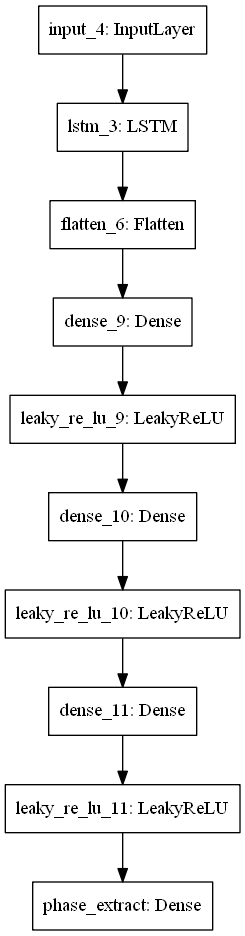

In [66]:
plot_model(model)

In [67]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
#optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

In [68]:
model.compile(
            optimizer=optimizer, 
            loss='mse',
            #metrics=['accuracy']
            )

In [69]:
es = EarlyStopping(monitor='val_loss', #do not change
                   mode='min',  #do not change
                   min_delta=.01,
                   verbose=1, # allows you to see more info per epoch
                   patience=20) # **** patience is how many validations to wait with nothing learned (patience * validation_freq)

mc = ModelCheckpoint(modelSaveFile, 
                     monitor='val_loss', 
                     mode='min', 
                     verbose=1, 
                     save_best_only=True)

In [70]:
#Setup Logging
logDir = "logging" + "\\" + modelType + "\\" + modelName + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=logDir)

#Train the model
history = model.fit(
                train_features, train_labels,
                validation_data=(valid_features, valid_labels),
                epochs=no_epochs,
                callbacks=[tensorboard, es, mc],
                batch_size=batch_size,
                shuffle=True,
                verbose=verbosity)

val_loss improved from 44.06979 to 27.35735, saving model to models\DNN\nanoConvPaper_v3.3.3_phase.h5
5/5 [==============================] - 1s 139ms/step - loss: 31.3627 - val_loss: 27.3573
Epoch 8/300
5/5 [==============================] - ETA: 0s - loss: 22.3243
Epoch 00008: val_loss improved from 27.35735 to 16.05493, saving model to models\DNN\nanoConvPaper_v3.3.3_phase.h5
5/5 [==============================] - 1s 138ms/step - loss: 22.3243 - val_loss: 16.0549
Epoch 9/300
5/5 [==============================] - ETA: 0s - loss: 18.4918
Epoch 00009: val_loss improved from 16.05493 to 14.12681, saving model to models\DNN\nanoConvPaper_v3.3.3_phase.h5
5/5 [==============================] - 1s 145ms/step - loss: 18.4918 - val_loss: 14.1268
Epoch 10/300
5/5 [==============================] - ETA: 0s - loss: 13.2014
Epoch 00010: val_loss improved from 14.12681 to 13.24724, saving model to models\DNN\nanoConvPaper_v3.3.3_phase.h5
5/5 [==============================] - 1s 136ms/step - loss:

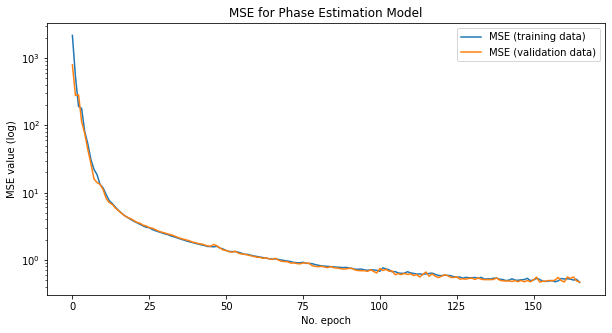

In [71]:
# Plot history: MSE
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.plot(history.history['val_loss'], label='MSE (validation data)')
plt.semilogy()
plt.title('MSE for Phase Estimation Model')
plt.ylabel('MSE value (log)')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

model.save(modelSaveFile)

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir {logDir}

In [72]:
model = load_model(modelSaveFile)

In [73]:
phase_pred = model.predict(test_features)

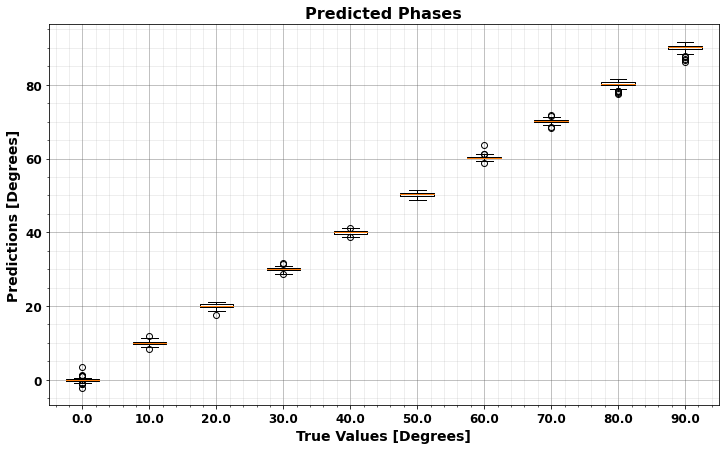

In [74]:
results = []
names = []
for phases in np.unique(test_labels):
    results.append(phase_pred[np.where(test_labels == phases)[0]].flatten())
    names.append(phases.round(2))
fig = plt.figure(figsize =(12, 7)) 
ax = fig.add_subplot(111)
bp = ax.boxplot(results)
plt.yticks(weight='bold', fontsize=12)
ax.set_xticklabels(names, weight='bold', fontsize=12)
plt.title('Predicted Phases', weight='bold', fontsize=16)
plt.xlabel('True Values [Degrees]', weight='bold', fontsize=14)
plt.ylabel('Predictions [Degrees]', weight='bold', fontsize=14)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show(bp)

plt.figure(figsize =(10, 7)) 
plt.scatter(test_labels, freq_pred)
plt.xlabel('True Values [frequency]')
plt.ylabel('Predictions [frequency]')

In [176]:
mae = metrics.mean_absolute_error(test_labels, phase_pred)
mse = metrics.mean_squared_error(test_labels, phase_pred)
r2 = metrics.r2_score(test_labels, phase_pred)

print('R^2: ', r2)
print('MAE: ', mae)
print('MSE: ', mse)

R^2:  0.9528649075946866
MAE:  5.5574536309577525
MSE:  40.04042094417662


In [177]:
for num in np.arange(10):
    print("Predicted Phase {}: {},  Actual Phase {}: {}".format(num, round(float(phase_pred[num][0]),3), num, test_labels[num].round(3)))
#print("Predicted frequency 21: {}, Actual Frequency 21: {}".format(round(float(phase_pred[21][0]),3), test_freq_val[21].round(3)))

Predicted Phase 0: 53.858,  Actual Phase 0: 60.0
Predicted Phase 1: 44.654,  Actual Phase 1: 50.0
Predicted Phase 2: 72.961,  Actual Phase 2: 80.0
Predicted Phase 3: 58.557,  Actual Phase 3: 70.0
Predicted Phase 4: 64.011,  Actual Phase 4: 70.0
Predicted Phase 5: 12.308,  Actual Phase 5: 10.0
Predicted Phase 6: -3.936,  Actual Phase 6: 0.0
Predicted Phase 7: 2.813,  Actual Phase 7: 10.0
Predicted Phase 8: 82.01,  Actual Phase 8: 90.0
Predicted Phase 9: 50.647,  Actual Phase 9: 60.0


In [178]:
closeness_1 = np.zeros(len(phase_pred))
for ii in range(len(phase_pred)):
    if phase_pred[ii][0].round(1) == test_labels[ii].round(1):
        closeness_1[ii] = 1
freq_closeness = (np.count_nonzero(closeness_1)/len(phase_pred))*100
print('Frequency predictions on the test set were accurate to 1 decimal place by %{}'.format(round(freq_closeness,2)))

Frequency predictions on the test set were accurate to 1 decimal place by %0.62


In [179]:
avg_accuracy = np.zeros((len(phase_pred),2))
for ii in range(len(phase_pred)):
    avg_accuracy[ii,0] = test_labels[ii] - phase_pred[ii][0]
    avg_accuracy[ii,1] = (test_labels[ii] - phase_pred[ii][0]) / test_labels[ii] * 100

print('Average Frequency Differed by {}Deg which was %{}'.format(avg_accuracy.mean(axis=0)[0].round(2), avg_accuracy.mean(axis=0)[1]))

Average Frequency Differed by 5.25Deg which was %nan


In [180]:
 phase_pred_train = model.predict(train_features)

In [181]:
for num in np.arange(10):
    print("Predicted Phase {}: {},  Actual Phase {}: {}".format(num, round(float(phase_pred_train[num][0]),3), num, train_labels[num].round(3)))

Predicted Phase 0: 13.525,  Actual Phase 0: 20.0
Predicted Phase 1: 36.397,  Actual Phase 1: 40.0
Predicted Phase 2: 60.292,  Actual Phase 2: 70.0
Predicted Phase 3: -0.635,  Actual Phase 3: 0.0
Predicted Phase 4: 86.078,  Actual Phase 4: 90.0
Predicted Phase 5: 61.084,  Actual Phase 5: 70.0
Predicted Phase 6: 61.653,  Actual Phase 6: 70.0
Predicted Phase 7: 33.47,  Actual Phase 7: 40.0
Predicted Phase 8: 76.045,  Actual Phase 8: 80.0
Predicted Phase 9: 44.257,  Actual Phase 9: 50.0


In [182]:
closeness_1 = np.zeros(len(phase_pred_train))
for ii in range(len(phase_pred_train)):
    if phase_pred_train[ii][0].round(1) == train_labels[ii].round(1):
        closeness_1[ii] = 1
freq_closeness = (np.count_nonzero(closeness_1)/len(phase_pred_train))*100
print('Phase predictions on the test set were accurate to 1 decimal place by %{}'.format(round(freq_closeness,2)))

Phase predictions on the test set were accurate to 1 decimal place by %0.43


In [183]:
avg_accuracy = np.zeros((len(phase_pred_train),2))
for ii in range(len(train_labels)):
    avg_accuracy[ii,0] = train_labels[ii] - phase_pred_train[ii][0]
    avg_accuracy[ii,1] = (train_labels[ii] - phase_pred_train[ii][0]) / train_labels[ii] * 100

print('Average Frequency Differed by {}Deg which was %{}'.format(avg_accuracy.mean(axis=0)[0].round(2), avg_accuracy.mean(axis=0)[1]))

Average Frequency Differed by 5.27Deg which was %nan
